In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

In [2]:
#  LOAD DATA
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
# 1. TAMPILKAN BEBERAPA BARIS PERTAMA DAN INFORMASI UMUM DATASET
print("="*50)
print("1. EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

1. EXPLORATORY DATA ANALYSIS (EDA)


In [4]:
# Menampilkan 5 baris pertama
print("\nDATA PREVIEW (5 BARIS PERTAMA):")
print(df.head())


DATA PREVIEW (5 BARIS PERTAMA):
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        

In [5]:
# Informasi umum dataset
print("\nINFORMASI UMUM DATASET:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Nama kolom: {', '.join(df.columns)}")


INFORMASI UMUM DATASET:
Jumlah baris: 2111
Jumlah kolom: 17
Nama kolom: Age, Gender, Height, Weight, CALC, FAVC, FCVC, NCP, SCC, SMOKE, CH2O, family_history_with_overweight, FAF, TUE, CAEC, MTRANS, NObeyesdad


In [6]:
# Tipe data
df = df.replace('?', np.nan)
kolom_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for kol in kolom_numerik:
    df[kol] = pd.to_numeric(df[kol], errors='coerce')
print("\nTIPE DATA:")
print(df.dtypes)


TIPE DATA:
Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [7]:
# Deskripsi Data
print("\nDESKRIPSI DATA :")
print(df.describe(include='all'))


DESKRIPSI DATA :
                Age Gender       Height       Weight       CALC  FAVC  \
count   2089.000000   2089  2089.000000  2092.000000       2091  2089   
unique          NaN      2          NaN          NaN          4     2   
top             NaN   Male          NaN          NaN  Sometimes   yes   
freq            NaN   1056          NaN          NaN       1386  1844   
mean      24.717928    NaN     1.706623    88.608184        NaN   NaN   
std        8.391323    NaN     0.117700    36.154617        NaN   NaN   
min       14.000000    NaN     1.450000    39.000000        NaN   NaN   
25%       19.955257    NaN     1.630000    66.000000        NaN   NaN   
50%       22.814657    NaN     1.701284    83.000000        NaN   NaN   
75%       26.000000    NaN     1.770000   108.055736        NaN   NaN   
max      106.441252    NaN     2.853986   441.131078        NaN   NaN   

               FCVC          NCP   SCC SMOKE         CH2O  \
count   2093.000000  2089.000000  2093  2098

In [8]:
# VISUALISASI DATA
print("="*50)
print("VISUALISASI DATA")
print("="*50)

VISUALISASI DATA


In [9]:
# Pengaturan untuk tampilan grafik
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)


Visualisai KOLOM NUMERIK


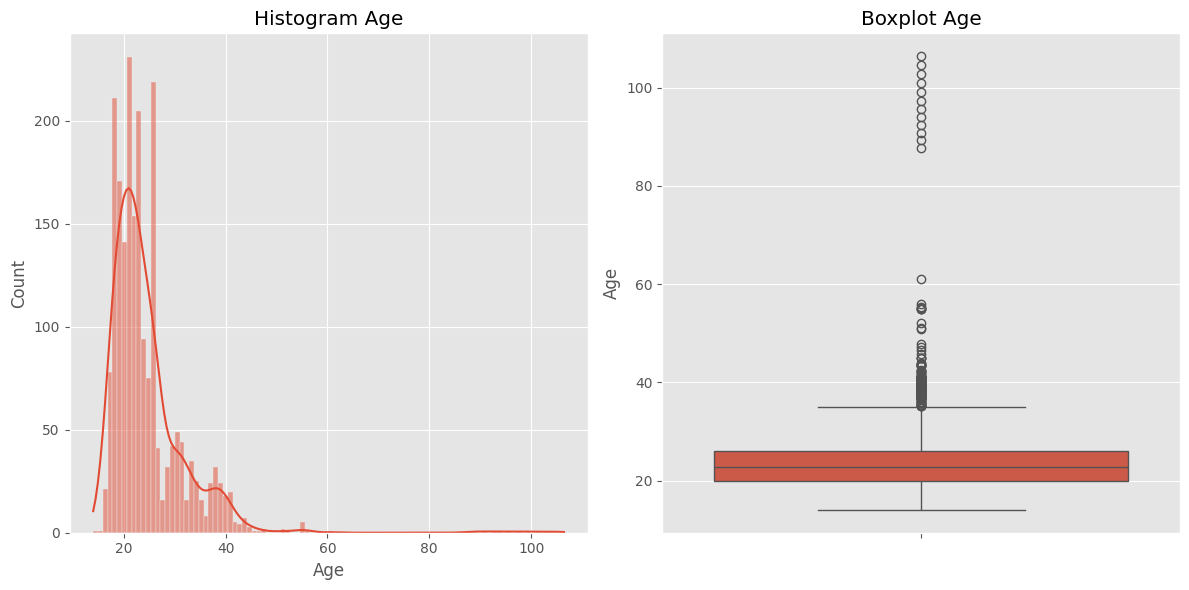

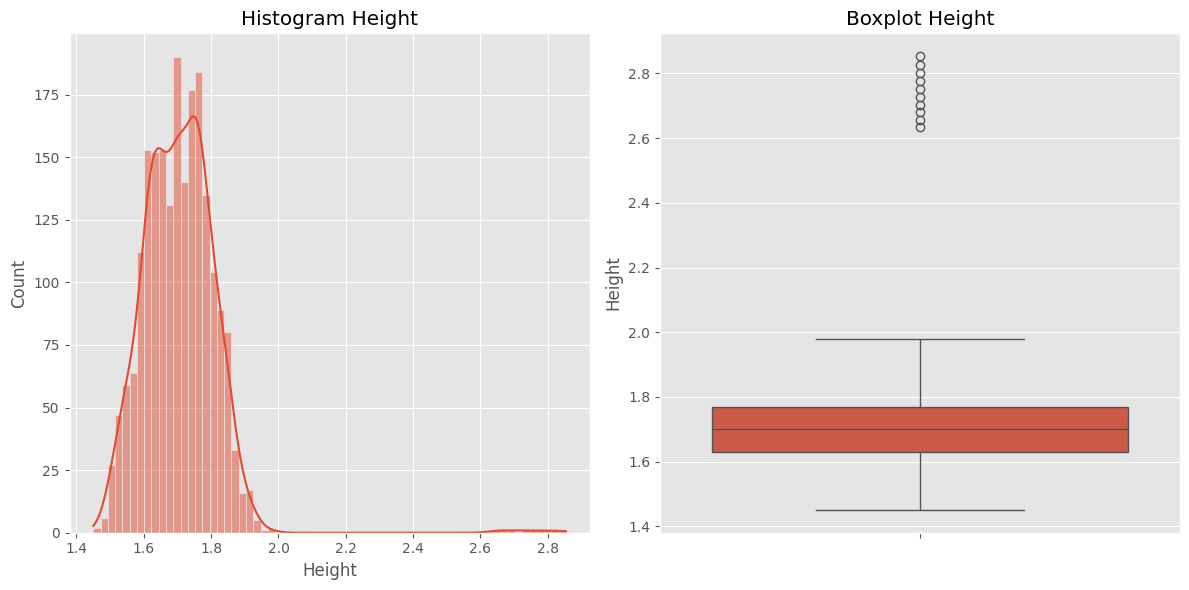

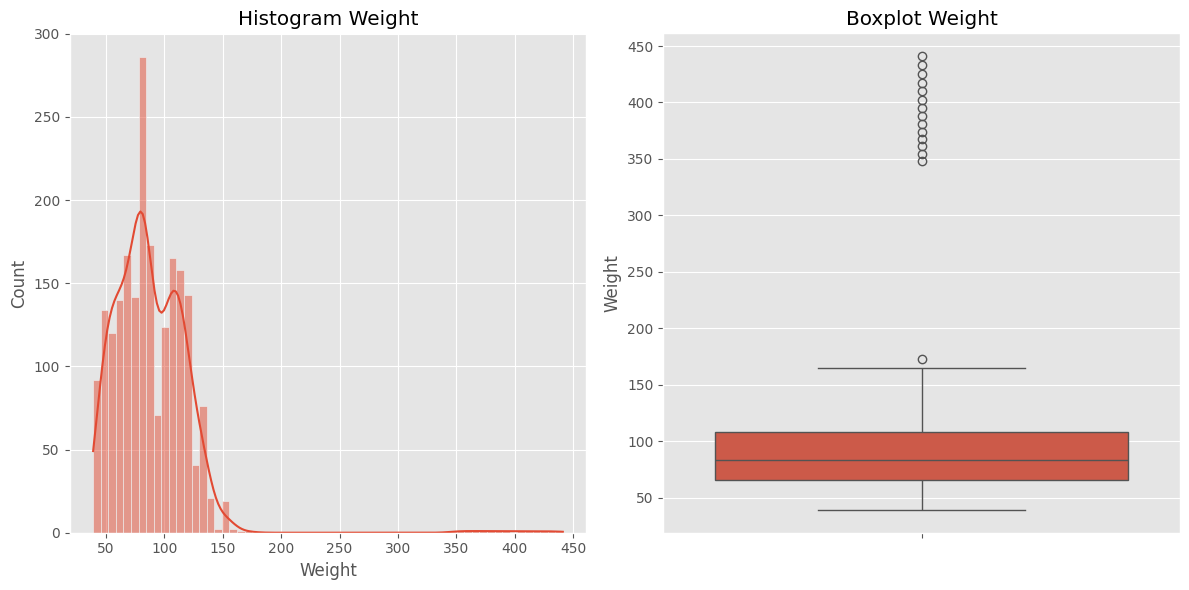

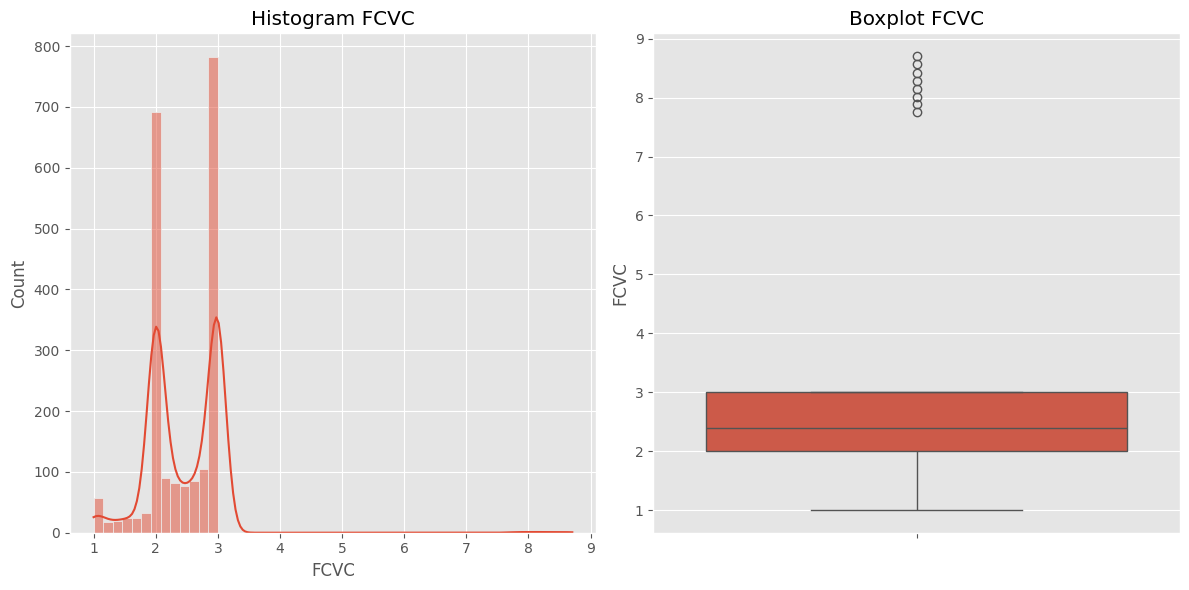

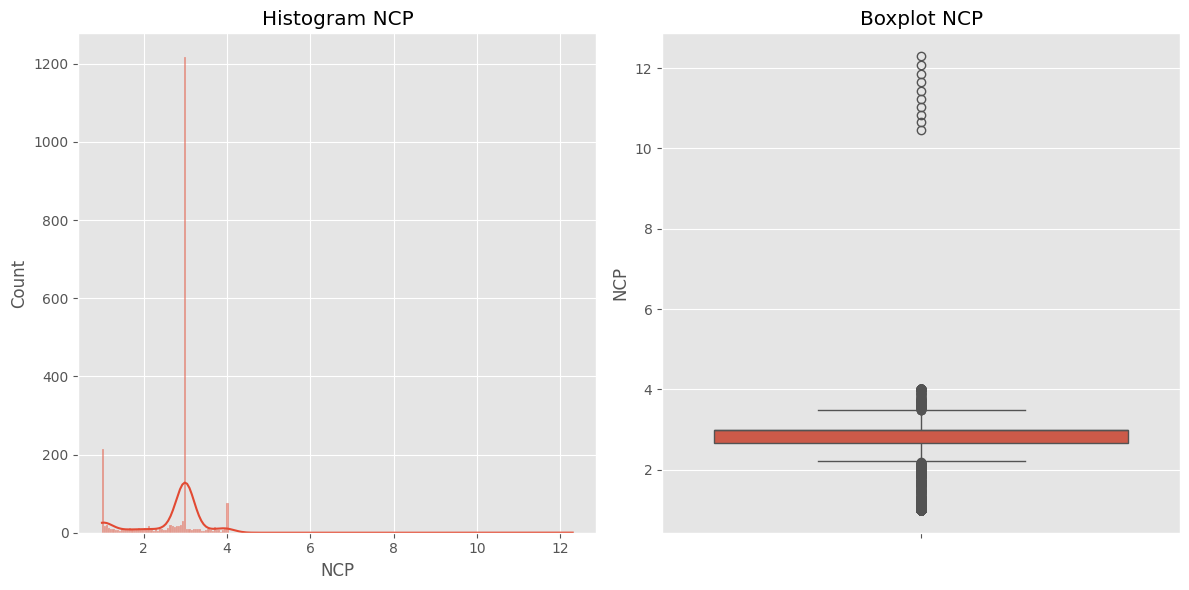

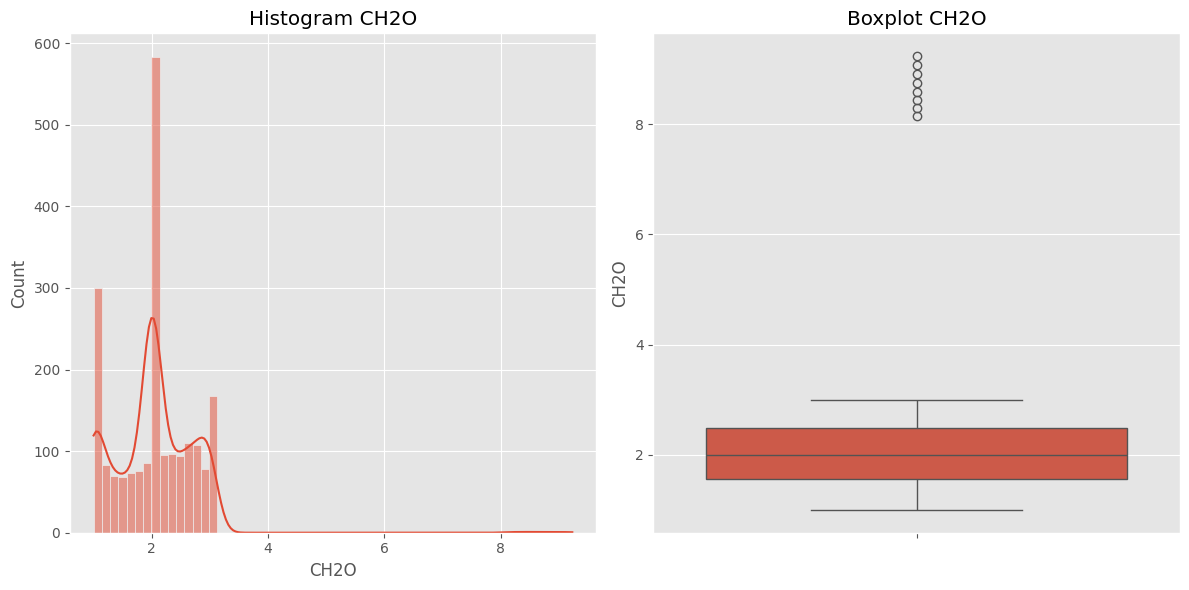

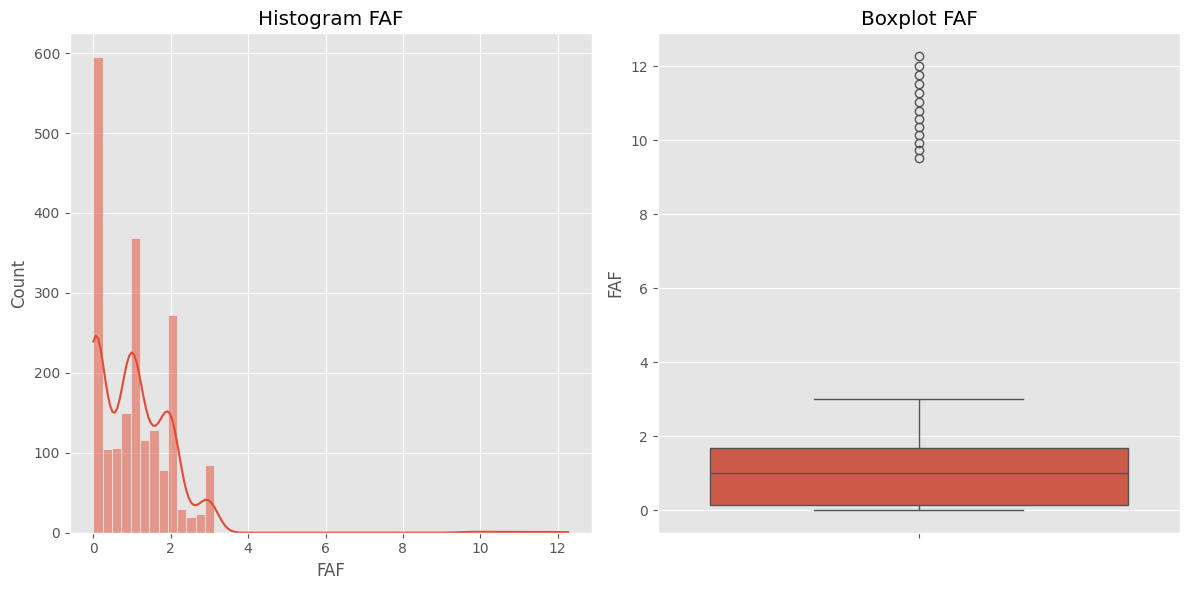

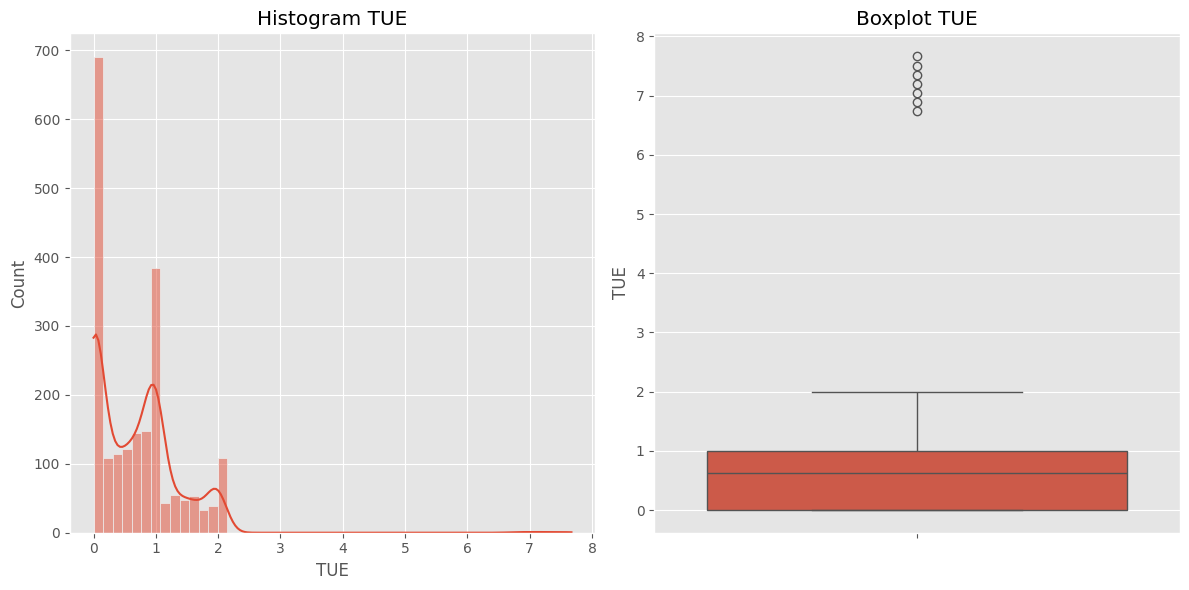

In [10]:
# Visualisasi kolom numerik
print("\nVisualisai KOLOM NUMERIK")
for i, col in enumerate(kolom_numerik):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
    
    plt.tight_layout()
    file_path = os.path.join('Assets/visualisasi_data/kolom_numerik', f'distribusi_{col}.png')

    plt.savefig(file_path)
    plt.show()


Visualisai KOLOM CATEGORICAL


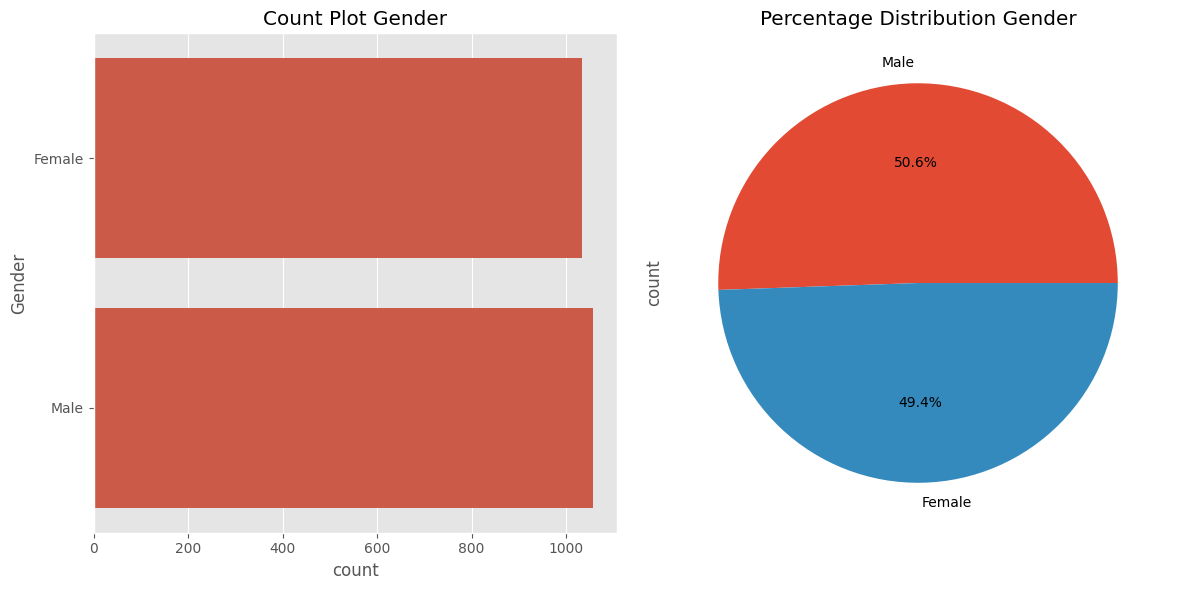

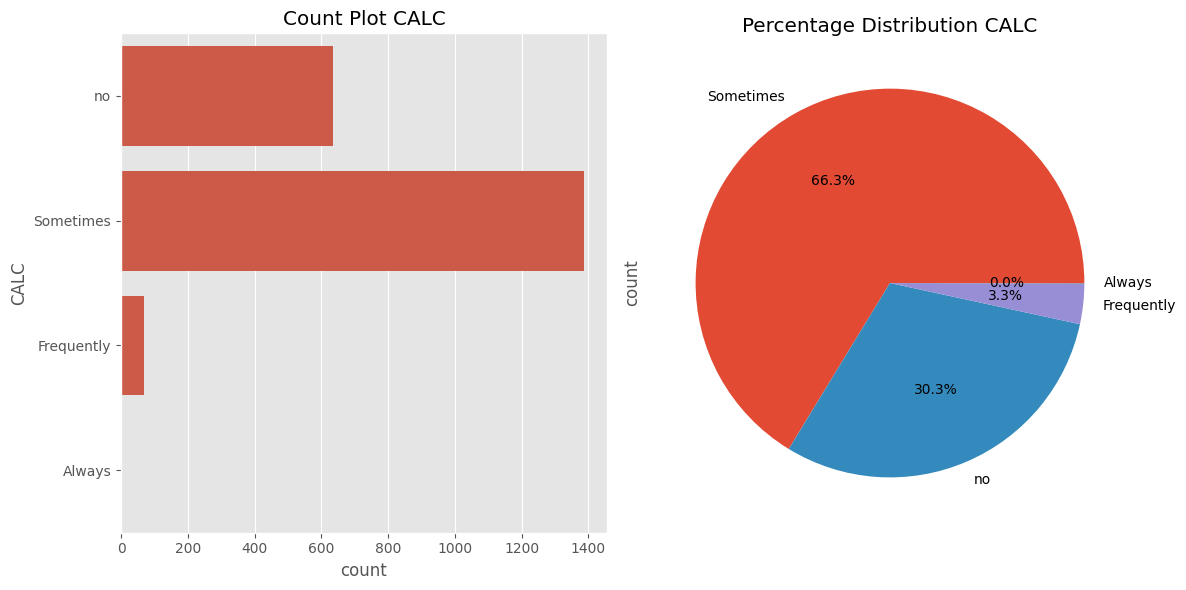

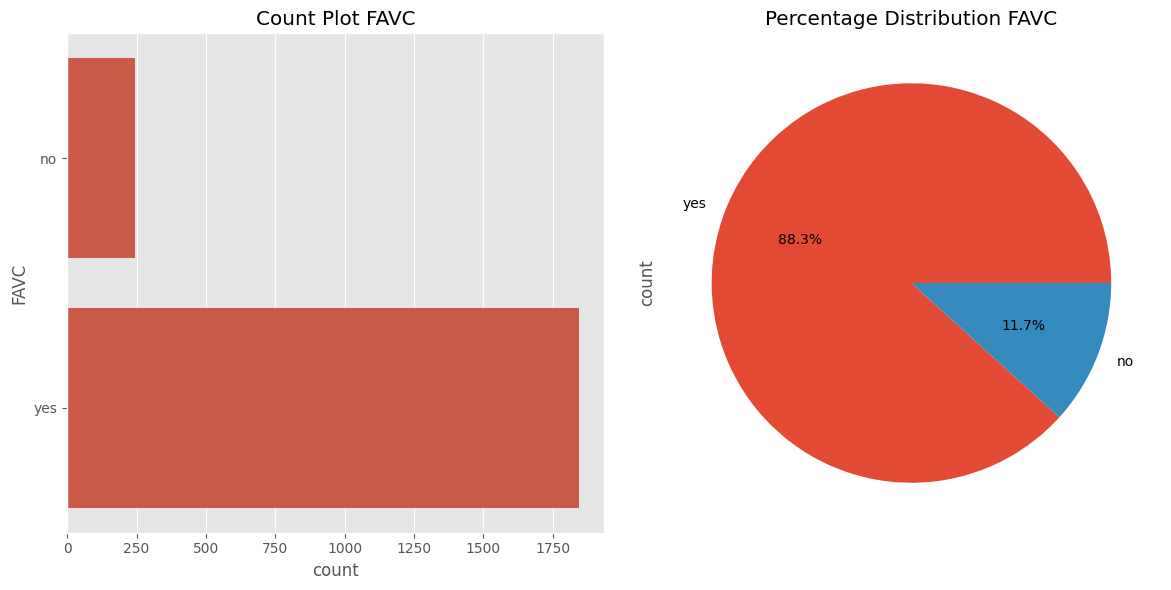

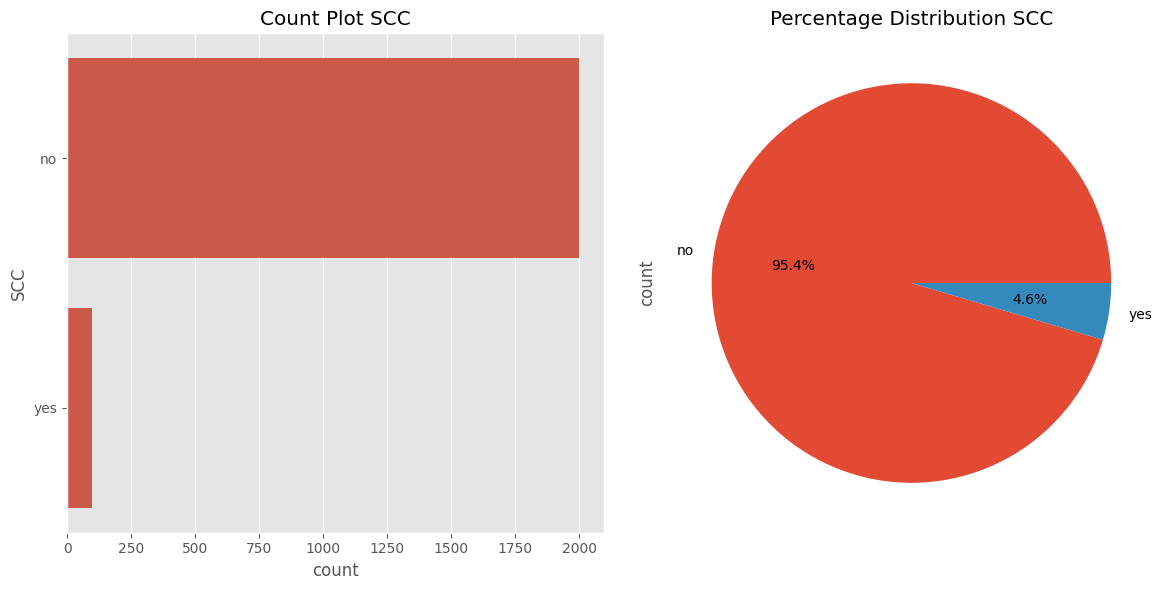

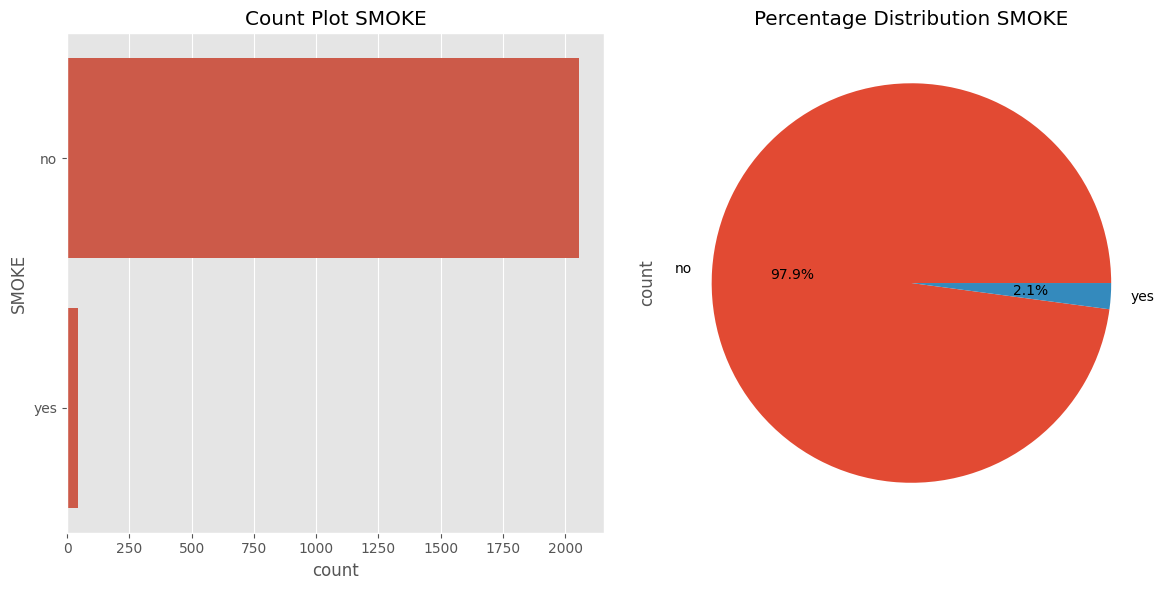

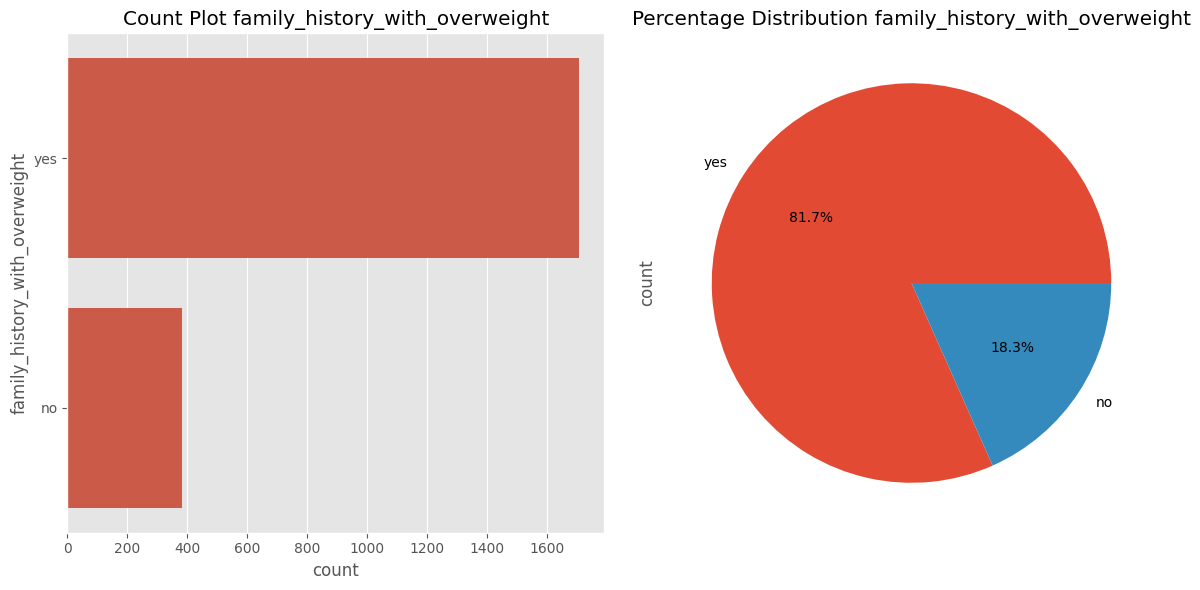

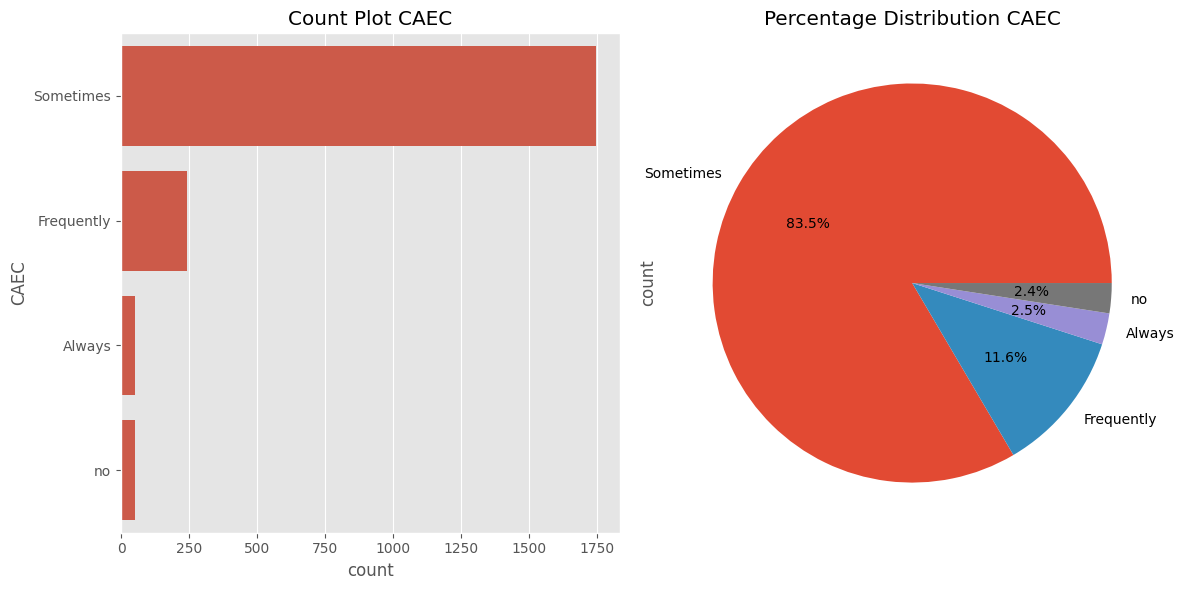

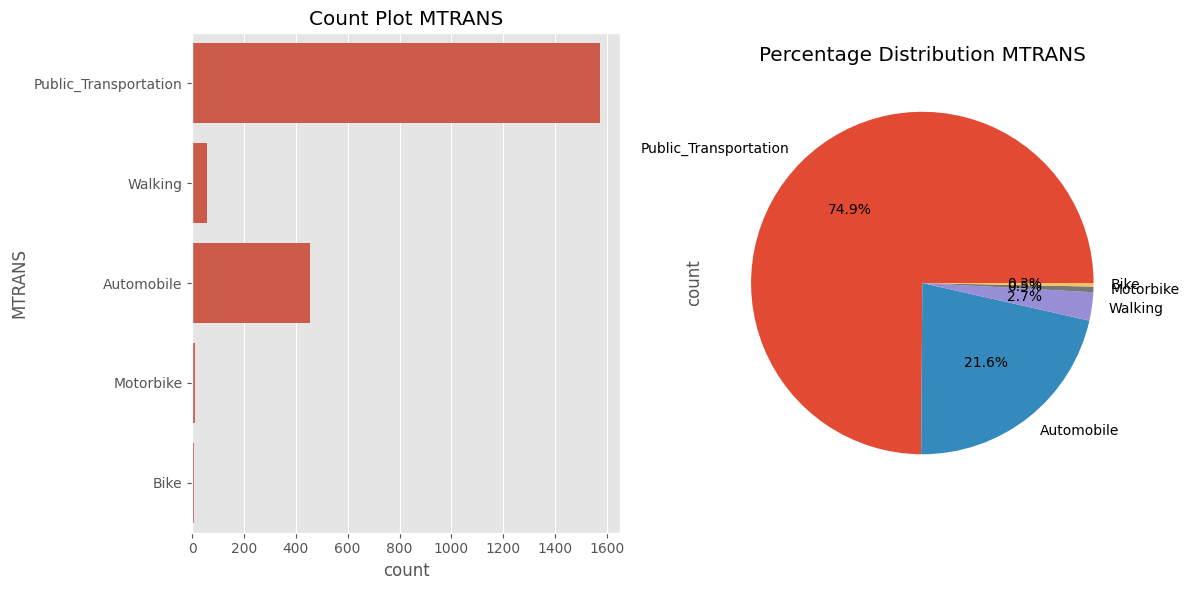

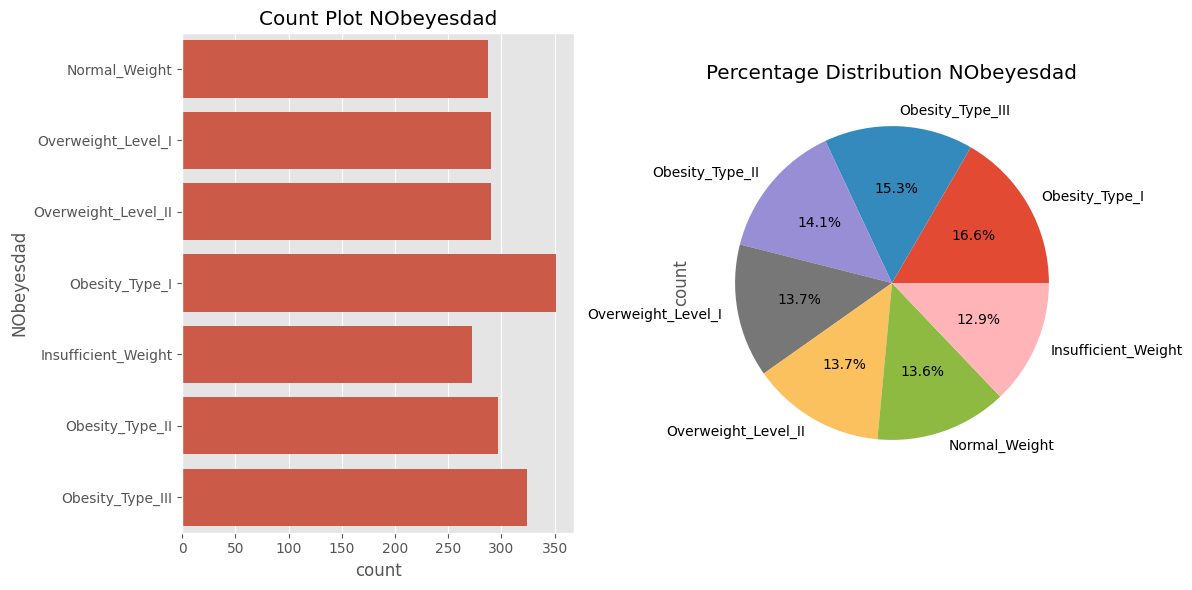

In [11]:
# Visualisasi kolom categorical
print("\nVisualisai KOLOM CATEGORICAL")
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 6))
    
    # Count plot for categorical data
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, y=col)
    plt.title(f'Count Plot {col}')
    
    # Pie chart for percentage distribution
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Percentage Distribution {col}')
    
    plt.tight_layout()
    file_path = os.path.join('Assets/visualisasi_data/kolom_categorical', f'distribusi_{col}.png')
    
    plt.savefig(file_path)
    plt.show()

In [12]:
#  CEK MISSING VALUES, UNIQUE VALUES, DATA DUPLIKAT, DAN OUTLIERS
print("="*50)
print("CEK KUALITAS DATA")
print("="*50)

CEK KUALITAS DATA


In [13]:
# 4.1 Missing Values
print("\nMISSING VALUES:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values,
                             'Percentage (%)': missing_percent})
print(missing_data[missing_data['Missing Values'] > 0])


MISSING VALUES:
                                Missing Values  Percentage (%)
Age                                         22        1.042160
Gender                                      22        1.042160
Height                                      22        1.042160
Weight                                      19        0.900047
CALC                                        20        0.947418
FAVC                                        22        1.042160
FCVC                                        18        0.852676
NCP                                         22        1.042160
SCC                                         18        0.852676
SMOKE                                       13        0.615822
CH2O                                        15        0.710564
family_history_with_overweight              23        1.089531
FAF                                         19        0.900047
TUE                                         15        0.710564
CAEC                                  

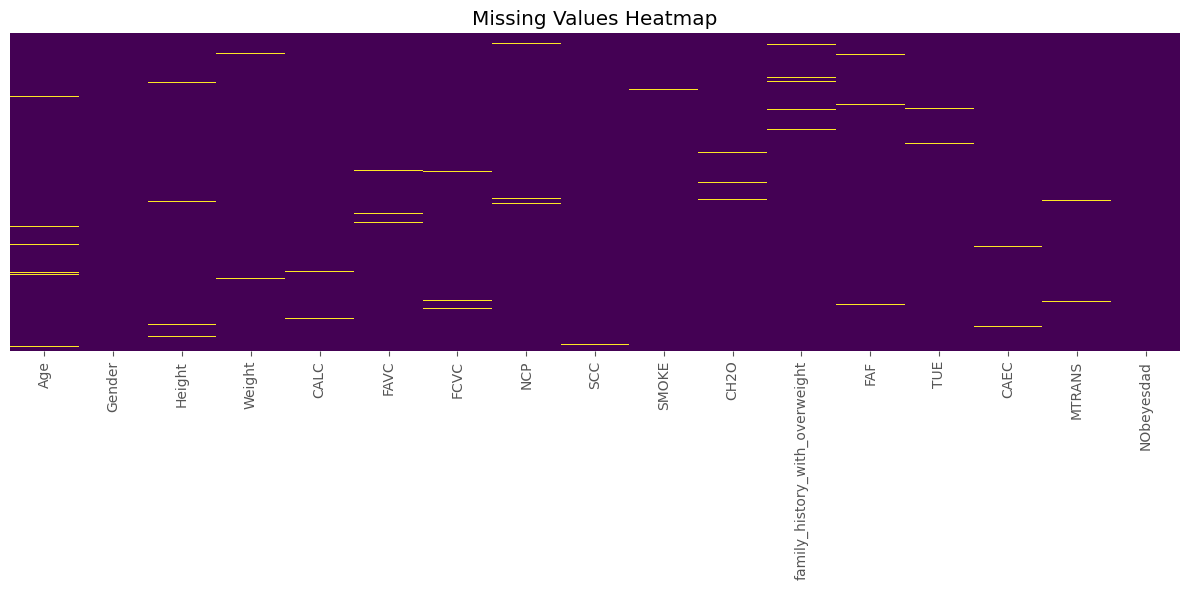

In [14]:
# Visualisasi missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.tight_layout()
file_path = os.path.join('Assets/missing_values', 'missing_values.png')
plt.savefig(file_path)
plt.show()

In [15]:
#  Unique Values
print("\nUNIQUE VALUES:")
unique_values = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Unique Ratio (%)': [(df[col].nunique() / len(df)) * 100 for col in df.columns]
})
print(unique_values)


UNIQUE VALUES:
                                                        Column Data Type  \
Age                                                        Age   float64   
Gender                                                  Gender    object   
Height                                                  Height   float64   
Weight                                                  Weight   float64   
CALC                                                      CALC    object   
FAVC                                                      FAVC    object   
FCVC                                                      FCVC   float64   
NCP                                                        NCP   float64   
SCC                                                        SCC    object   
SMOKE                                                    SMOKE    object   
CH2O                                                      CH2O   float64   
family_history_with_overweight  family_history_with_overweight    object

In [16]:
# Data Duplikat
print("\nDATA DUPLIKAT:")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates} ({(duplicates/len(df))*100:.2f}%)")


DATA DUPLIKAT:
Jumlah baris duplikat: 18 (0.85%)



KESEIMBANGAN DATA KATEGORIKAL:

Distribusi untuk Gender:
  Male: 1056 (50.02%)
  Female: 1033 (48.93%)


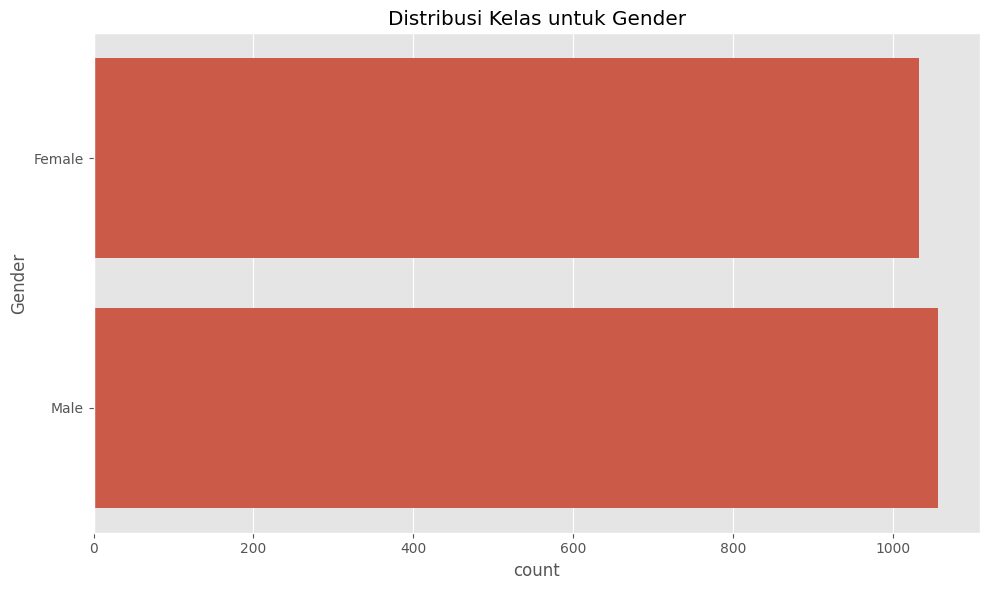


Distribusi untuk CALC:
  Sometimes: 1386 (65.66%)
  no: 634 (30.03%)
  Frequently: 70 (3.32%)
  Always: 1 (0.05%)


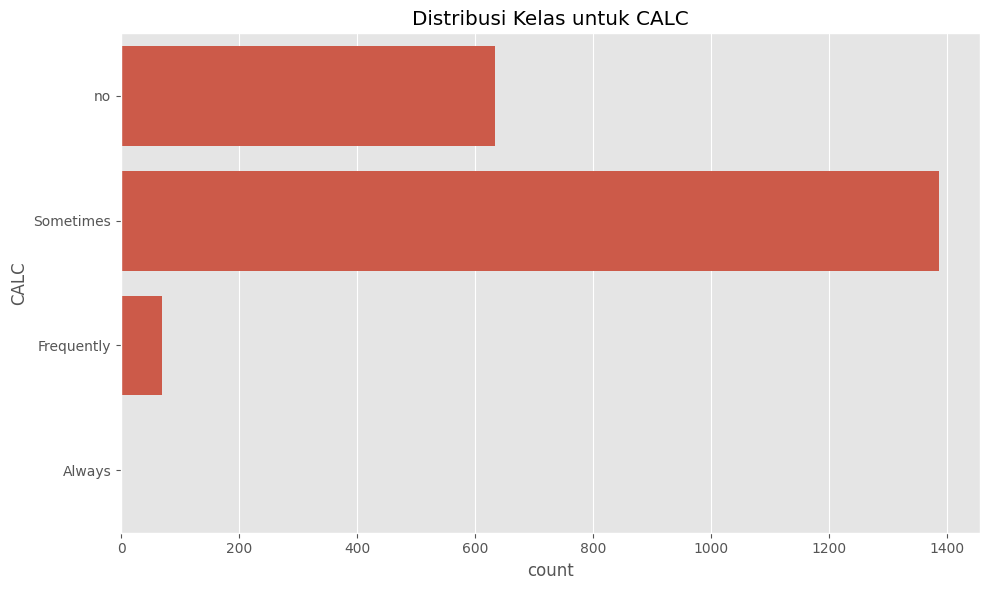


Distribusi untuk FAVC:
  yes: 1844 (87.35%)
  no: 245 (11.61%)


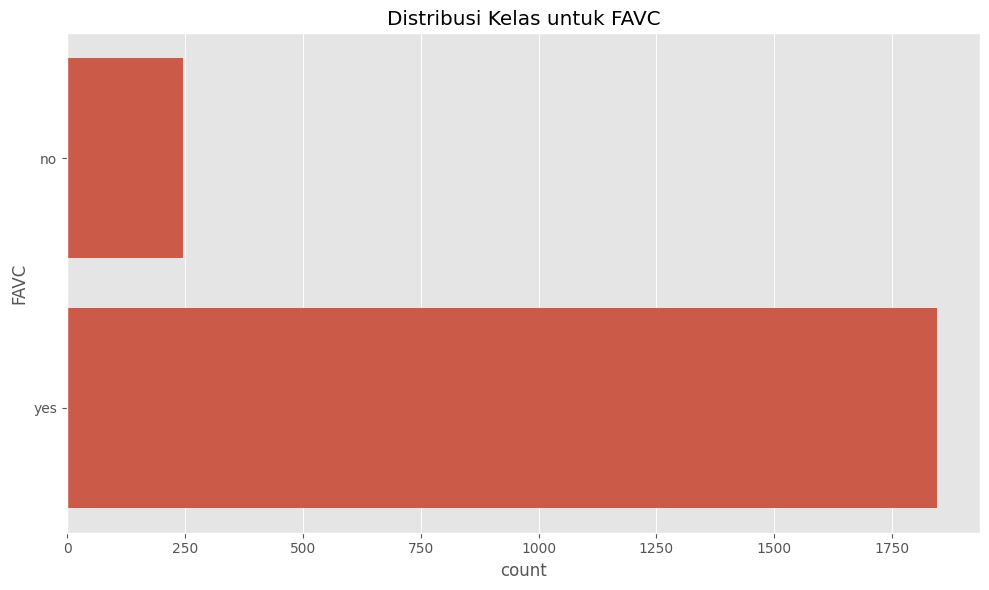


Distribusi untuk SCC:
  no: 1997 (94.60%)
  yes: 96 (4.55%)


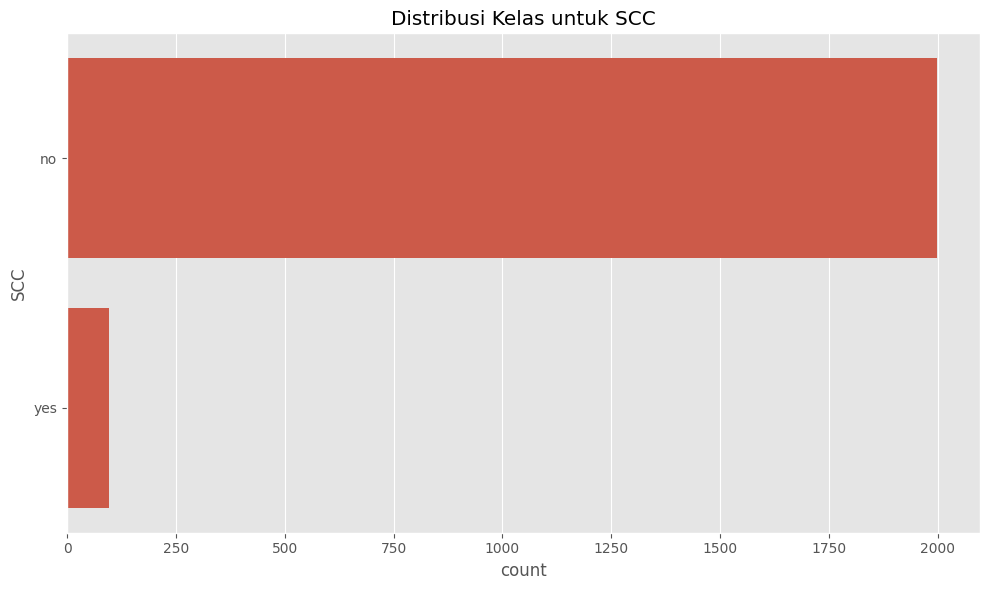


Distribusi untuk SMOKE:
  no: 2054 (97.30%)
  yes: 44 (2.08%)


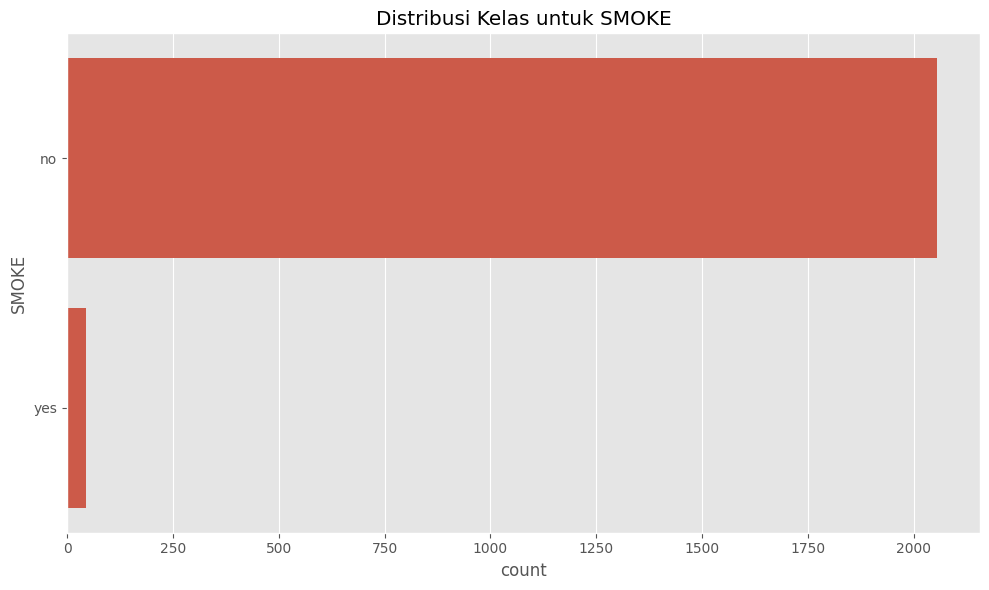


Distribusi untuk family_history_with_overweight:
  yes: 1705 (80.77%)
  no: 383 (18.14%)


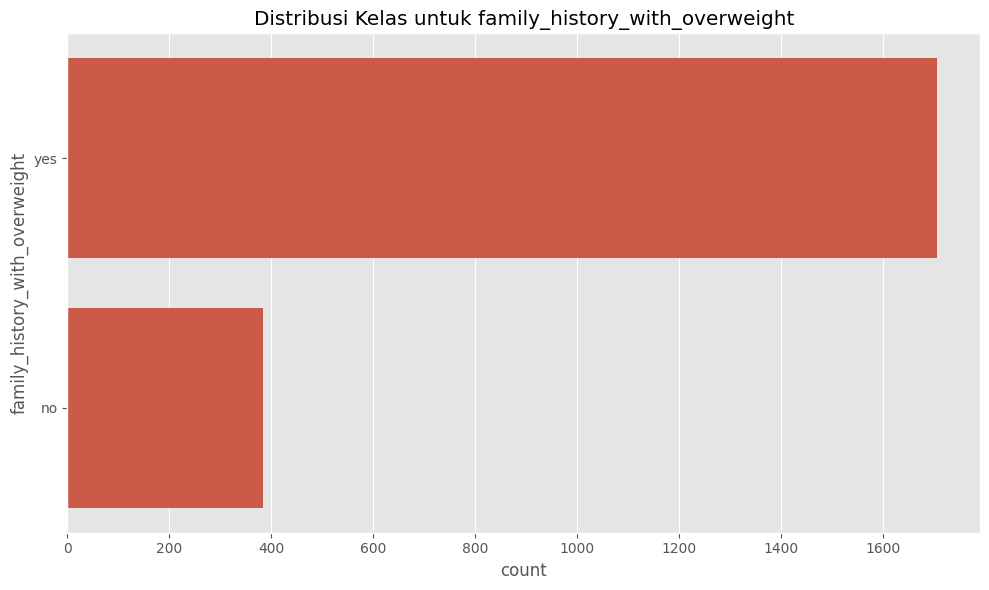


Distribusi untuk CAEC:
  Sometimes: 1747 (82.76%)
  Frequently: 242 (11.46%)
  Always: 53 (2.51%)
  no: 51 (2.42%)


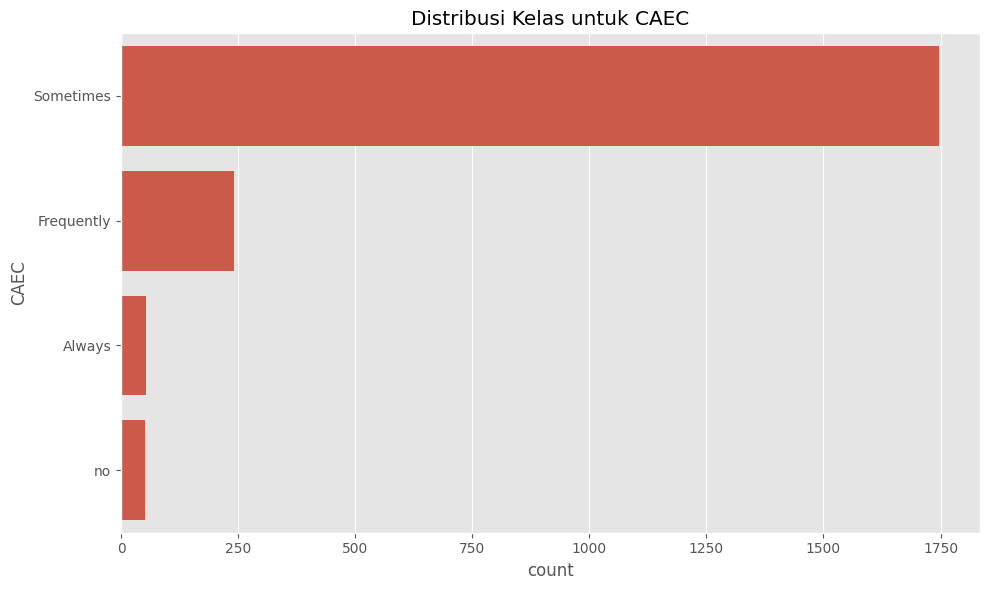


Distribusi untuk MTRANS:
  Public_Transportation: 1572 (74.47%)
  Automobile: 453 (21.46%)
  Walking: 56 (2.65%)
  Motorbike: 11 (0.52%)
  Bike: 7 (0.33%)


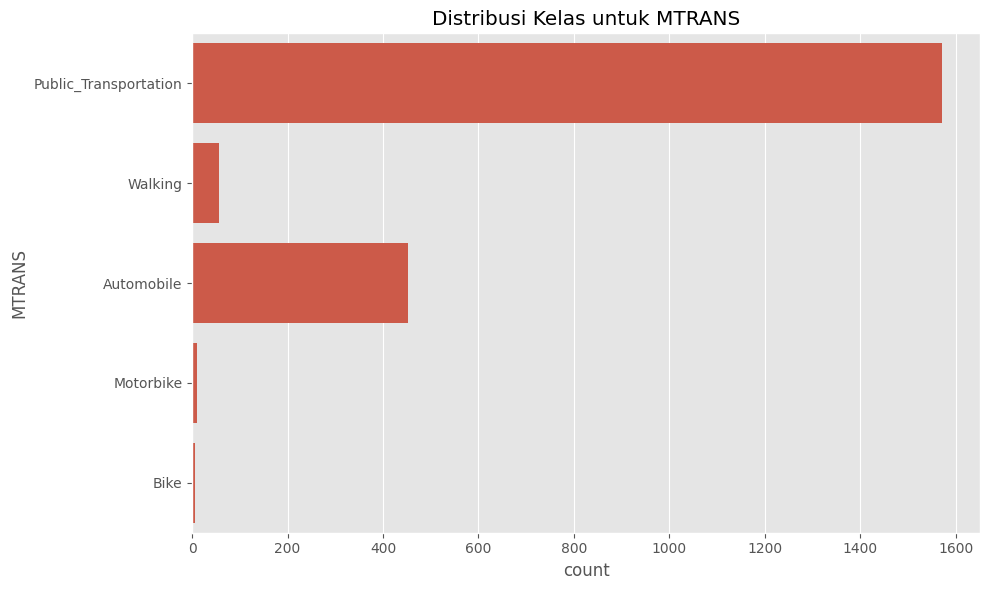


Distribusi untuk NObeyesdad:
  Obesity_Type_I: 351 (16.63%)
  Obesity_Type_III: 324 (15.35%)
  Obesity_Type_II: 297 (14.07%)
  Overweight_Level_I: 290 (13.74%)
  Overweight_Level_II: 290 (13.74%)
  Normal_Weight: 287 (13.60%)
  Insufficient_Weight: 272 (12.88%)


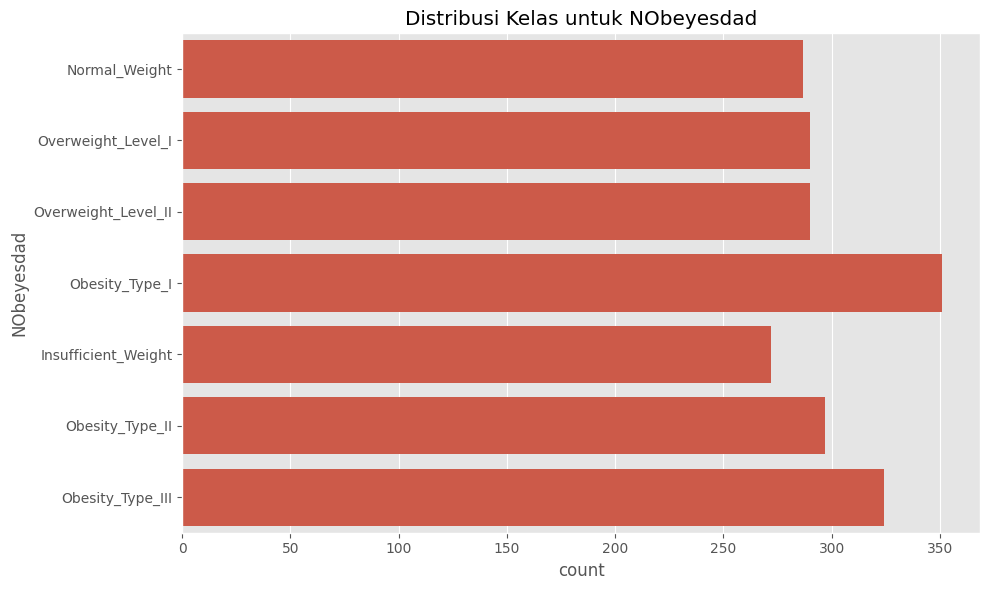

In [17]:
# Keseimbangan Data (untuk data kategorikal dan target )
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nKESEIMBANGAN DATA KATEGORIKAL:")
    for col in categorical_cols:
        if df[col].nunique() < 10:  # Hanya tampilkan jika jumlah kelas < 10
            class_counts = df[col].value_counts()
            class_percents = (class_counts / len(df)) * 100

            print(f"\nDistribusi untuk {col}:")
            for cls, count in class_counts.items():
                print(f"  {cls}: {count} ({class_percents[cls]:.2f}%)")

            # Visualisasi keseimbangan
            plt.figure(figsize=(10, 6))
            sns.countplot(y=df[col])
            plt.title(f'Distribusi Kelas untuk {col}')
            plt.tight_layout()
            file_path = os.path.join('Assets/class_balance/categorical', f'class_balance_{col}.png')
            plt.savefig(file_path)
            plt.show()

In [18]:
# DETEKSI OUTLIER
print("\nDETEKSI OUTLIER (MENGGUNAKAN METODE IQR):")


DETEKSI OUTLIER (MENGGUNAKAN METODE IQR):


In [19]:
# Ganti '?' dengan NaN
df = df.replace('?', np.nan)

In [20]:
# Inisialisasi dictionary untuk menyimpan informasi outlier
outlier_summary = {}

In [21]:
# Ringkasan outlier untuk kolom numerik dan kategorikal
# Untuk kolom numerik
for col in kolom_numerik:
    if df[col].isna().all():
        print(f"Kolom {col}: Tidak dapat menghitung outlier (semua data NaN)")
        continue
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_summary[col] = outlier_count

# Untuk kolom kategorikal
print("\nFrekuensi tidak umum pada kolom kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    value_counts = df[col].value_counts()
    total_count = len(df)
    rare_values = value_counts[value_counts/total_count < 0.01]  # kurang dari 1%
    
    if len(rare_values) > 0:
        print(f"\n{col}:")
        for value, count in rare_values.items():
            print(f"  {value}: {count} ({(count/total_count)*100:.2f}%)")
print("\nRingkasan Outlier:")
if all(count == 0 for count in outlier_summary.values()):
    print("  Tidak ada outlier yang ditemukan di semua kolom numerik.")
else:
    for col, count in outlier_summary.items():
        if count > 0:
            print(f"  {col}: {count} outlier ditemukan")


Frekuensi tidak umum pada kolom kategorikal:

CALC:
  Always: 1 (0.05%)

MTRANS:
  Motorbike: 11 (0.52%)
  Bike: 7 (0.33%)

Ringkasan Outlier:
  Age: 179 outlier ditemukan
  Height: 10 outlier ditemukan
  Weight: 15 outlier ditemukan
  FCVC: 8 outlier ditemukan
  NCP: 592 outlier ditemukan
  CH2O: 8 outlier ditemukan
  FAF: 13 outlier ditemukan
  TUE: 7 outlier ditemukan


In [22]:
# 5. KESIMPULAN
print("="*50)
print("KESIMPULAN EDA")
print("="*50)
print("\nBerikut kesimpulan dari proses EDA:")
print("1. Dataset memiliki {} baris dan {} kolom.".format(df.shape[0], df.shape[1]))

KESIMPULAN EDA

Berikut kesimpulan dari proses EDA:
1. Dataset memiliki 2111 baris dan 17 kolom.


In [23]:
# Missing values
if missing_values.sum() > 0:
    print("2. Terdapat {} missing values pada {} kolom.".format(
        missing_values.sum(), len(missing_data[missing_data['Missing Values'] > 0])))
else:
    print("2. Tidak terdapat missing values pada dataset.")

2. Terdapat 300 missing values pada 16 kolom.


In [24]:
# Duplicates
if duplicates > 0:
    print("3. Terdapat {} baris duplikat ({:.2f}%).".format(duplicates, (duplicates/len(df))*100))
else:
    print("3. Tidak terdapat data duplikat pada dataset.")

3. Terdapat 18 baris duplikat (0.85%).


In [30]:
# Outliers
# Initialize empty list for outlier count
outlier_count = []

# Check outliers in numeric columns using IQR method
for col in kolom_numerik:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
    if len(outliers) > 0:
        outlier_count.append(col)

# Check rare values in categorical columns (values appearing less than 1% of the time)
for col in df.select_dtypes(include=['object']).columns:
    value_counts = df[col].value_counts()
    total_count = len(df)
    rare_values = value_counts[value_counts/total_count < 0.01]  # less than 1%
    if len(rare_values) > 0:
        outlier_count.append(col)
        
if len(outlier_count) > 0:
    print("4. Terdeteksi outlier pada kolom: {}.".format(", ".join(outlier_count)))
else:
    print("4. Tidak terdeteksi outlier pada dataset.")

4. Terdeteksi outlier pada kolom: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, CALC, MTRANS.


In [31]:
# 2. Tpreprocessing data
print("="*50)
print("2. PREPROCESSING DATA")
print("="*50)

2. PREPROCESSING DATA
